In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-8.860851017710559 122.54819722436275
9.606202126689766 178.2661088026099
-18.330854029295807 -21.067461067164857
80.16200842763558 -60.81054295258423
-11.717936295344558 16.904379121188356
-7.79553976785941 -84.25809034307757
-76.78098361575898 39.18373458759382
24.12640240406823 28.332260800631758
-75.54491525788568 -66.66966355849155
35.042356119376336 -83.93471363853757
56.43807825052784 168.42832104215768
-24.47917524183825 60.06250660087392
6.613737732710575 94.12603866727272
4.226742795707324 77.13884505056569
-31.034053869162243 -134.0083390030017
-24.227515938353577 -42.40630920328965
45.888439464322204 109.49733793035267
-76.09088303419948 -165.08638860675728
82.04133968647267 162.41427918040966
-7.539293437300273 134.62962769257723
-42.32426955040543 163.00471522748222
-77.16354300006269 -27.130212566505236
-49.689267664416434 163.44145856261696
47.740797687957354 50.4751829029737
78.95152794183258 76.27159420403154
47.769181604593825 147.87525297175898
82.38054513939619 -13

-35.49386381773861 111.7540020484156
-1.4981037275664022 -29.993924061023904
-51.47248269564289 117.4350510513886
-15.678598554196725 -28.03343945524236
79.89694706213862 -100.5895423117011
-85.93222422305121 -173.7998777803744
-28.107553063887366 -88.68544971360625
15.863022093607412 -105.3282583291598
65.4409030500477 94.82812149595401
80.35940477547456 -83.35101182007641
82.5674921464751 70.37182053706164
55.12971381185724 -127.2945439569155
-69.5909271511176 -179.90279386383503
3.5435422657045734 -106.40341710941132
-13.187941209662824 -144.9998877310959
-9.606875824861433 -84.02375334459936
88.34522347670486 -33.935588102668106
-21.62275635818817 -119.44677489853056
-65.99258872489756 2.4133066619209274
68.68900093095772 174.50622843551992
85.98666132645437 17.402970953801827
47.4758608213788 -74.94536858718986
42.45158488188025 36.86291925311204
-69.04577055777372 11.631283135651131
6.404449613267701 -80.0775519960953
-50.881940462327414 127.04283410053392
83.27186819717247 63.30

-53.0004128909475 -27.089697341320488
76.5408737594787 72.04011104056443
-25.750397572111197 -85.69083354561043
-41.06756896694275 -105.64097593182638
-24.829197867940664 139.07244885166654
57.53122704345785 94.0963635784089
-64.52845559691278 -93.9999207203457
3.816101402906696 176.52232840903395
-27.33761112863555 37.19955352825173
20.24343100017279 -169.2420988671525
-89.27349670988161 -39.48297492635376
-8.851133178381573 107.72615514270905
-76.15914196787978 -12.54603197639426
-27.51428755987243 -97.30581410033815
-10.623541507127769 97.87647082742359
3.391319944274386 -9.014075911438965
29.136196010900633 -86.21387623981263
-46.07198096151828 -42.07370909563997
86.18092678740689 50.15585481813943
-42.10657228553868 82.41614807519159
-67.0674871528809 17.41076069806445
-8.475080939331619 -45.730854140398634
-54.439550760818555 64.57604712974441
-42.607455243841514 121.26575041828636
-8.64284877541391 82.37404212991049
16.010733683209878 -47.701922577484964
27.53262044028766 -42.76

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ef9bf0547790bf4aeb1f16b7170bd634


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maumere
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | catabola
Processing Record 6 of Set 1 | sechura
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | tahta
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | maryville
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | sabang
Processing Record 14 of Set 1 | galle
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | saquarema
Processing Record 17 of Set 1 | darhan
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | tual
Processing Record 21 of Set 1 | te anau
Processing Record 22 of Set 1 | tuatapere
Processing Record 23 of Set 1 | inderborskiy
City not fo

Processing Record 42 of Set 4 | shumskiy
Processing Record 43 of Set 4 | aiton
Processing Record 44 of Set 4 | namatanai
Processing Record 45 of Set 4 | laguna
Processing Record 46 of Set 4 | high level
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | bowen
Processing Record 49 of Set 4 | erdenet
Processing Record 50 of Set 4 | pangai
Processing Record 1 of Set 5 | loandjili
Processing Record 2 of Set 5 | sao jose da coroa grande
Processing Record 3 of Set 5 | harper
Processing Record 4 of Set 5 | lodja
Processing Record 5 of Set 5 | hobart
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | kanniyakumari
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | mutoko
Processing Record 10 of Set 5 | iwanai
Processing Record 11 of Set 5 | saint-philippe
Processing Record 12 of Set 5 | ribeira grande
Processing Record 13 of Set 5 | taltal
Processing Record 14 of Set 5 | sur
Processing Record 15 of Set 5 | isangel
Processing Reco

Processing Record 37 of Set 8 | tawkar
City not found. Skipping...
Processing Record 38 of Set 8 | ambilobe
Processing Record 39 of Set 8 | sibolga
Processing Record 40 of Set 8 | talcahuano
Processing Record 41 of Set 8 | bolshoy uluy
City not found. Skipping...
Processing Record 42 of Set 8 | launceston
Processing Record 43 of Set 8 | bria
Processing Record 44 of Set 8 | scottsbluff
Processing Record 45 of Set 8 | puerto baquerizo moreno
Processing Record 46 of Set 8 | izazi
Processing Record 47 of Set 8 | rio grande
Processing Record 48 of Set 8 | longlac
City not found. Skipping...
Processing Record 49 of Set 8 | leiyang
Processing Record 50 of Set 8 | labuhan
Processing Record 1 of Set 9 | jackson
Processing Record 2 of Set 9 | sheltozero
Processing Record 3 of Set 9 | point pedro
Processing Record 4 of Set 9 | asau
Processing Record 5 of Set 9 | bonthe
Processing Record 6 of Set 9 | vila do maio
Processing Record 7 of Set 9 | gandu
Processing Record 8 of Set 9 | kibre mengist
Pro

Processing Record 23 of Set 12 | paradwip
City not found. Skipping...
Processing Record 24 of Set 12 | fallon
Processing Record 25 of Set 12 | grindsted
Processing Record 26 of Set 12 | butte
Processing Record 27 of Set 12 | mao
Processing Record 28 of Set 12 | channel-port aux basques
Processing Record 29 of Set 12 | koppang
Processing Record 30 of Set 12 | visby
Processing Record 31 of Set 12 | sistranda
Processing Record 32 of Set 12 | acajutla
Processing Record 33 of Set 12 | bandarbeyla
Processing Record 34 of Set 12 | derzhavinsk
Processing Record 35 of Set 12 | naryan-mar
Processing Record 36 of Set 12 | mergui
City not found. Skipping...
Processing Record 37 of Set 12 | erenhot
Processing Record 38 of Set 12 | kefamenanu
Processing Record 39 of Set 12 | bam
Processing Record 40 of Set 12 | rungata
City not found. Skipping...
Processing Record 41 of Set 12 | luga
Processing Record 42 of Set 12 | riberalta
Processing Record 43 of Set 12 | minab
Processing Record 44 of Set 12 | do

In [15]:
len(city_data)

559

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maumere,-8.6199,122.2111,79.99,82,78,5.14,ID,2021-03-27 18:22:16
1,Butaritari,3.0707,172.7902,81.16,78,96,13.78,KI,2021-03-27 18:22:16
2,Georgetown,5.4112,100.3354,82.40,89,20,5.66,MY,2021-03-27 18:22:17
3,Narsaq,60.9167,-46.0500,8.60,40,75,6.91,GL,2021-03-27 18:18:32
4,Catabola,-12.1500,17.2833,63.28,91,94,1.81,AO,2021-03-27 18:22:17
5,Sechura,-5.5569,-80.8222,81.86,54,63,7.90,PE,2021-03-27 18:22:17
6,Port Alfred,-33.5906,26.8910,67.24,72,19,19.39,ZA,2021-03-27 18:20:44
7,Tahta,26.7693,31.5021,68.00,18,0,13.80,EG,2021-03-27 18:22:17
8,Ushuaia,-54.8000,-68.3000,57.20,67,75,20.71,AR,2021-03-27 18:17:49
9,Maryville,35.7565,-83.9705,59.00,88,90,8.05,US,2021-03-27 18:22:18


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maumere,ID,2021-03-27 18:22:16,-8.6199,122.2111,79.99,82,78,5.14
1,Butaritari,KI,2021-03-27 18:22:16,3.0707,172.7902,81.16,78,96,13.78
2,Georgetown,MY,2021-03-27 18:22:17,5.4112,100.3354,82.40,89,20,5.66
3,Narsaq,GL,2021-03-27 18:18:32,60.9167,-46.0500,8.60,40,75,6.91
4,Catabola,AO,2021-03-27 18:22:17,-12.1500,17.2833,63.28,91,94,1.81
5,Sechura,PE,2021-03-27 18:22:17,-5.5569,-80.8222,81.86,54,63,7.90
6,Port Alfred,ZA,2021-03-27 18:20:44,-33.5906,26.8910,67.24,72,19,19.39
7,Tahta,EG,2021-03-27 18:22:17,26.7693,31.5021,68.00,18,0,13.80
8,Ushuaia,AR,2021-03-27 18:17:49,-54.8000,-68.3000,57.20,67,75,20.71
9,Maryville,US,2021-03-27 18:22:18,35.7565,-83.9705,59.00,88,90,8.05


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

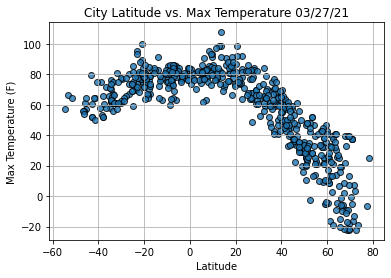

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

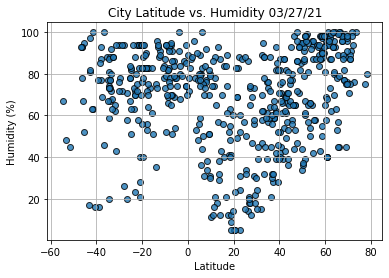

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

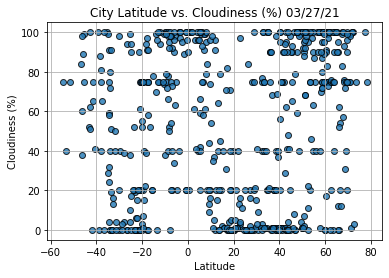

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

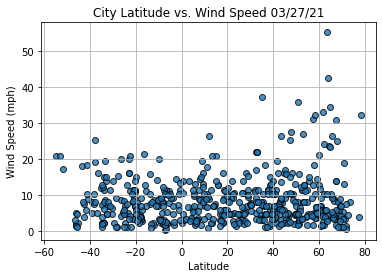

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                        Galle
Country                        LK
Date          2021-03-27 18:22:19
Lat                        6.0367
Lng                        80.217
Max Temp                    76.96
Humidity                       83
Cloudiness                    100
Wind Speed                   2.77
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
554     True
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2021-03-27 18:22:16,3.0707,172.7902,81.16,78,96,13.78
2,Georgetown,MY,2021-03-27 18:22:17,5.4112,100.3354,82.40,89,20,5.66
3,Narsaq,GL,2021-03-27 18:18:32,60.9167,-46.0500,8.60,40,75,6.91
7,Tahta,EG,2021-03-27 18:22:17,26.7693,31.5021,68.00,18,0,13.80
9,Maryville,US,2021-03-27 18:22:18,35.7565,-83.9705,59.00,88,90,8.05


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

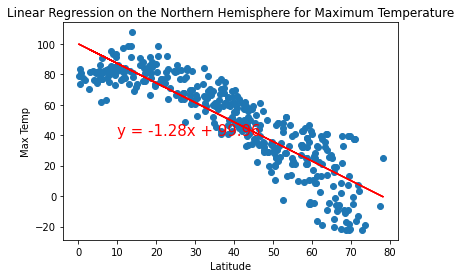

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

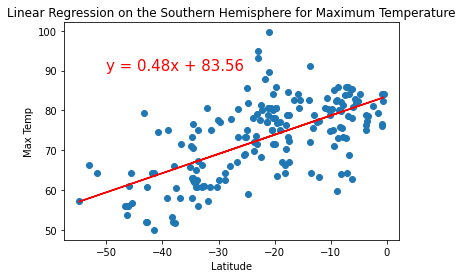

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

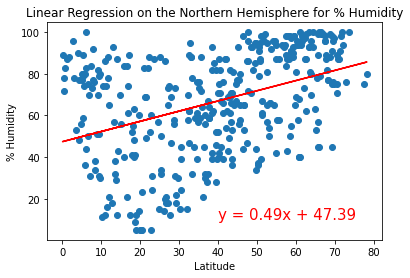

LinregressResult(slope=0.4898594809657667, intercept=47.385948166446966, rvalue=0.399898087248423, pvalue=7.169718765398979e-16, stderr=0.05805599940452478)

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))
linregress(x_values, y_values)

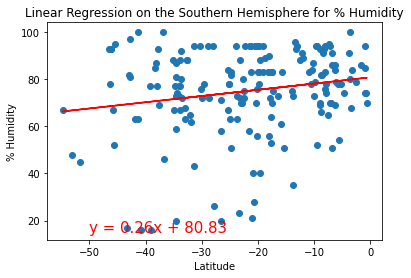

LinregressResult(slope=0.26430390868744513, intercept=80.83434731336283, rvalue=0.18538758376912665, pvalue=0.011987547522044896, stderr=0.10413323342598964)

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))
linregress(x_values, y_values)

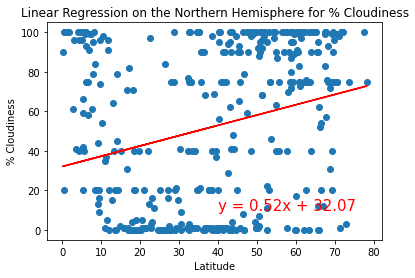

LinregressResult(slope=0.5209646545739602, intercept=32.070205482196506, rvalue=0.2633252943764566, pvalue=2.209570468583492e-07, stderr=0.09869050121383321)

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))
linregress(x_values, y_values)

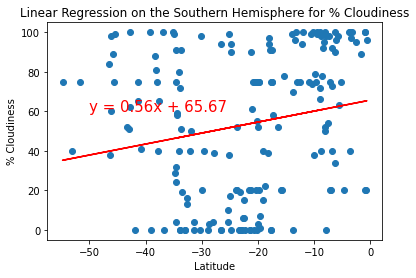

LinregressResult(slope=0.55552496437584, intercept=65.66724578700641, rvalue=0.19532986564068863, pvalue=0.00805294894733965, stderr=0.20732346950634725)

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))
linregress(x_values, y_values)

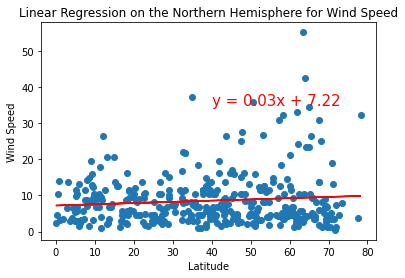

LinregressResult(slope=0.033955852573204326, intercept=7.21571571854021, rvalue=0.09702512259345908, pvalue=0.0601681497656431, stderr=0.018011121607224755)

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))
linregress(x_values, y_values)

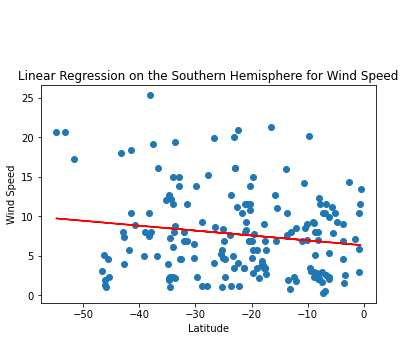

LinregressResult(slope=-0.06221368611537003, intercept=6.328474165834395, rvalue=-0.15304782191622987, pvalue=0.03860170331166678, stderr=0.029858817024103996)

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
linregress(x_values, y_values)